In [398]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

<Axes: xlabel='time'>

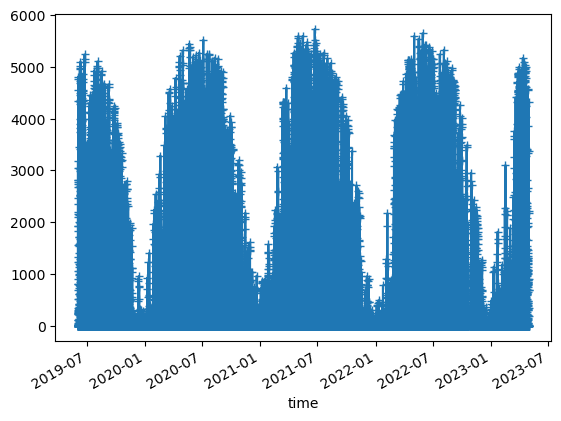

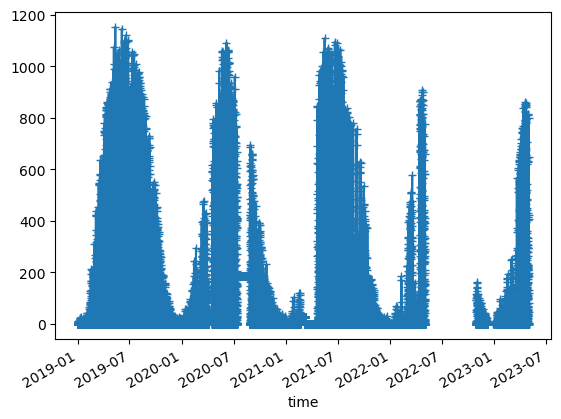

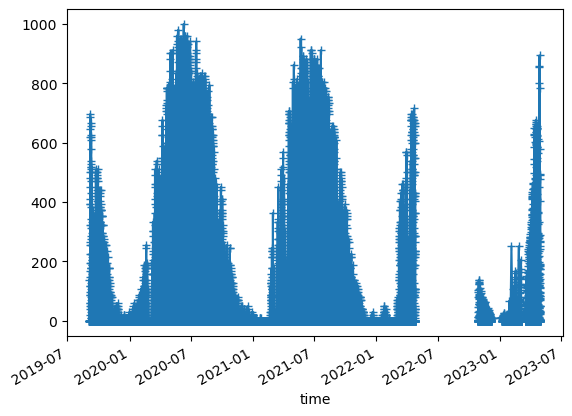

In [399]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

plt.figure()
(train_a['pv_measurement']).plot(marker = '+')
plt.figure()
train_b['pv_measurement'].plot(marker = '+')
plt.figure()
train_c['pv_measurement'].plot(marker = '+')

In [400]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [401]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

In [402]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

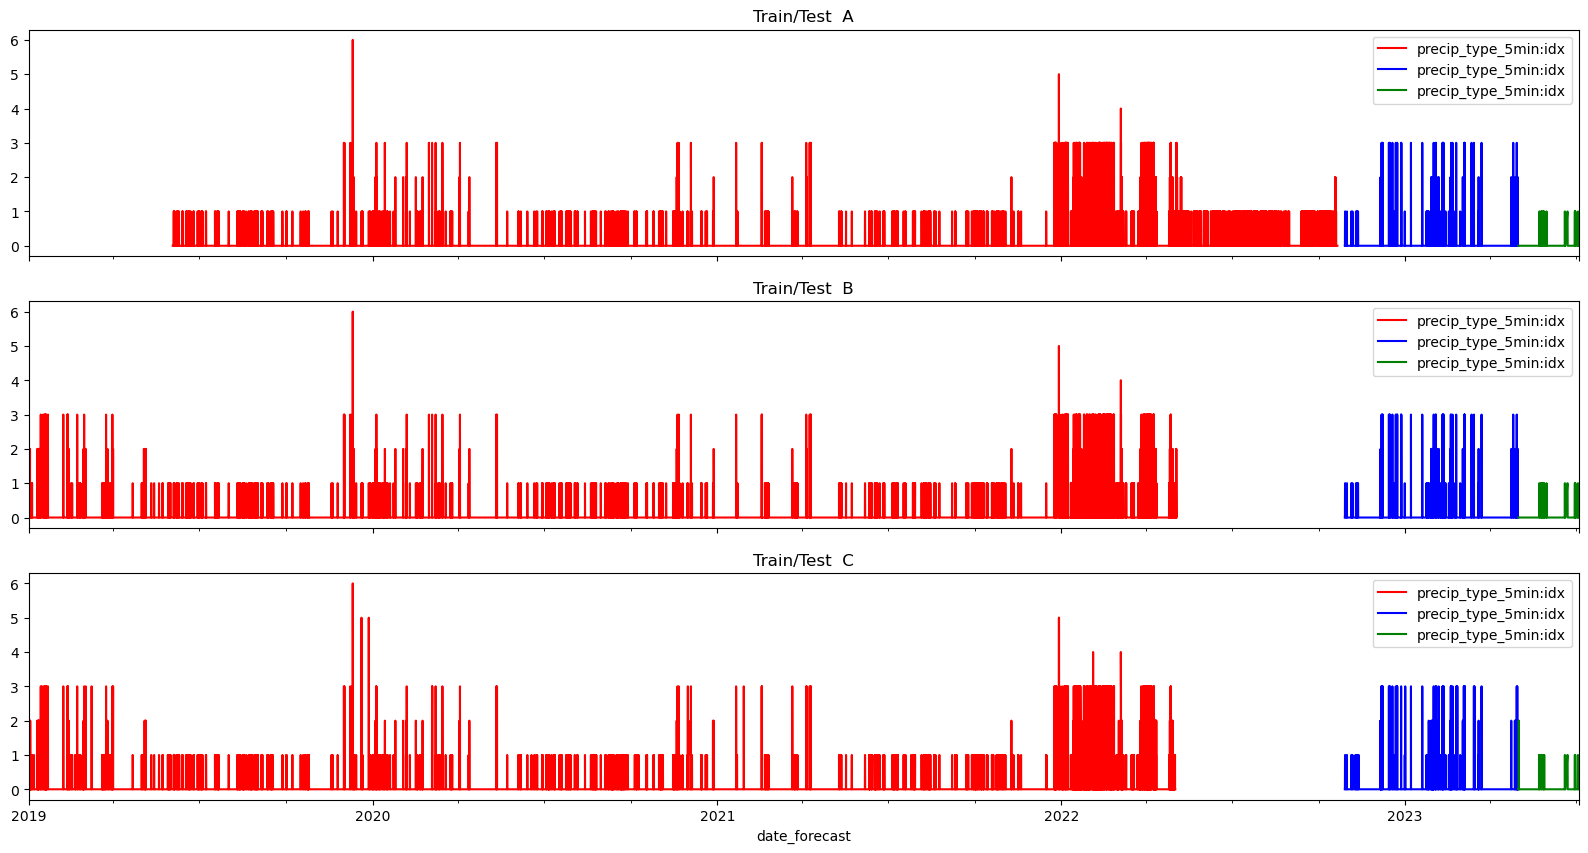

In [403]:
# Plotting a single feature
feature_name = 'precip_type_5min:idx'

fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


# Pre-processing : 

In [404]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

#Delete features because high correlation between them (>0.9) : 
X_train_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

#Delete because constant values:
X_train_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)


In [405]:
#We change the Time that is a string, to a variable in seconds 
timestamp_s_observed_a = X_train_observed_a['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_observed_b = X_train_observed_b['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_observed_c = X_train_observed_c['date_forecast'].map(pd.Timestamp.timestamp)

timestamp_s_estimated_a = X_train_estimated_a['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_estimated_b = X_train_estimated_b['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_estimated_c = X_train_estimated_c['date_forecast'].map(pd.Timestamp.timestamp)

timestamp_s_test_a = X_test_estimated_a['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_test_b = X_test_estimated_b['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_test_c = X_test_estimated_c['date_forecast'].map(pd.Timestamp.timestamp)

#Then, we incorporate the periodicity
day = 24*60*60
year = (365.2425)*day

X_train_observed_a['Day sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Day cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Year sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / year))
X_train_observed_a['Year cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / year))

X_train_observed_b['Day sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Day cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Year sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / year))
X_train_observed_b['Year cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / year))

X_train_observed_c['Day sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Day cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Year sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / year))
X_train_observed_c['Year cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / year))


X_train_estimated_a['Day sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Day cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Year sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / year))
X_train_estimated_a['Year cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / year))

X_train_estimated_b['Day sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Day cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Year sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / year))
X_train_estimated_b['Year cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / year))

X_train_estimated_c['Day sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Day cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Year sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / year))
X_train_estimated_c['Year cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / year))


X_test_estimated_a['Day sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Day cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Year sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / year))
X_test_estimated_a['Year cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / year))

X_test_estimated_b['Day sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Day cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Year sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / year))
X_test_estimated_b['Year cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / year))

X_test_estimated_c['Day sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Day cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Year sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / year))
X_test_estimated_c['Year cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / year))


In [406]:
#We change the sun_azimuth variable, because an angle in degree is not really comprehensible for the machine (0 and 360 should be the same)
#therefore, we introduce the sinus and cosinus features
X_train_observed_a['sun_azimuth_cos:'] = np.cos(X_train_observed_a['sun_azimuth:d'])
X_train_observed_a['sun_azimuth_sin:'] = np.sin(X_train_observed_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_cos:'] = np.cos(X_train_estimated_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_sin:'] = np.sin(X_train_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_cos:'] = np.cos(X_test_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_sin:'] = np.sin(X_test_estimated_a['sun_azimuth:d'])
X_train_observed_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)


X_train_observed_b['sun_azimuth_cos:'] = np.cos(X_train_observed_b['sun_azimuth:d'])
X_train_observed_b['sun_azimuth_sin:'] = np.sin(X_train_observed_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_cos:'] = np.cos(X_train_estimated_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_sin:'] = np.sin(X_train_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_cos:'] = np.cos(X_test_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_sin:'] = np.sin(X_test_estimated_b['sun_azimuth:d'])
X_train_observed_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)

X_train_observed_c['sun_azimuth_cos:'] = np.cos(X_train_observed_c['sun_azimuth:d'])
X_train_observed_c['sun_azimuth_sin:'] = np.sin(X_train_observed_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_cos:'] = np.cos(X_train_estimated_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_sin:'] = np.sin(X_train_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_cos:'] = np.cos(X_test_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_sin:'] = np.sin(X_test_estimated_c['sun_azimuth:d'])
X_train_observed_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)

In [407]:
#We match the sizes of X and Y 
#We keep the measurements from every hour only 
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

#We put the dates as the indexes of the data, and we remove some dates that are not in the corresponding y data.
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)

X_train_estimated_a_matched = X_train_estimated_a.loc[intersection_index_estimated_a]
train_a_estimated_matched = train_a.loc[intersection_index_estimated_a]
X_train_observed_a_matched = X_train_observed_a.loc[intersection_index_observed_a]
train_a_observed_matched = train_a.loc[intersection_index_observed_a]

X_train_estimated_b_matched = X_train_estimated_b.loc[intersection_index_estimated_b]
train_b_estimated_matched = train_b.loc[intersection_index_estimated_b]
X_train_observed_b_matched = X_train_observed_b.loc[intersection_index_observed_b]
train_b_observed_matched = train_b.loc[intersection_index_observed_b]

X_train_estimated_c_matched = X_train_estimated_c.loc[intersection_index_estimated_c]
train_c_estimated_matched = train_c.loc[intersection_index_estimated_c]
X_train_observed_c_matched = X_train_observed_c.loc[intersection_index_observed_c]
train_c_observed_matched = train_c.loc[intersection_index_observed_c]



In [408]:
#One Hot encoding 
from sklearn.preprocessing import OneHotEncoder

idx = ['dew_or_rime:idx',\
       'is_day:idx', 
       'is_in_shadow:idx',
       'precip_type_5min:idx',]

for id in idx:
    concatenated_df = pd.concat([X_train_observed_a_matched[id], X_train_estimated_a_matched[id], X_test_estimated_a[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_a_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_a_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_a.index]
    X_train_observed_a_matched = pd.concat([X_train_observed_a_matched, df_observed_encoded], axis =1)
    X_train_estimated_a_matched = pd.concat([X_train_estimated_a_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_a = pd.concat([X_test_estimated_a, df_test_encoded], axis = 1)
    X_train_observed_a_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_a_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_a.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_b_matched[id], X_train_estimated_b_matched[id], X_test_estimated_b[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_b_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_b_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_b.index]
    X_train_observed_b_matched = pd.concat([X_train_observed_b_matched, df_observed_encoded], axis =1)
    X_train_estimated_b_matched = pd.concat([X_train_estimated_b_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_b = pd.concat([X_test_estimated_b, df_test_encoded], axis = 1)
    X_train_observed_b_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_b_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_b.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_c_matched[id], X_train_estimated_c_matched[id], X_test_estimated_c[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_c_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_c_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_c.index]
    X_train_observed_c_matched = pd.concat([X_train_observed_c_matched, df_observed_encoded], axis =1)
    X_train_estimated_c_matched = pd.concat([X_train_estimated_c_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_c = pd.concat([X_test_estimated_c, df_test_encoded], axis = 1)
    X_train_observed_c_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_c_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_c.drop([id], inplace = True, axis=1)


absolute_humidity_2m:gm3             0
air_density_2m:kgm3                  0
ceiling_height_agl:m              6636
clear_sky_rad:W                      0
cloud_base_agl:m                  2457
diffuse_rad:W                        0
direct_rad:W                         0
effective_cloud_cover:p              0
elevation:m                          0
fresh_snow_12h:cm                    0
fresh_snow_1h:cm                     0
fresh_snow_24h:cm                    0
fresh_snow_3h:cm                     0
fresh_snow_6h:cm                     0
precip_5min:mm                       0
pressure_100m:hPa                    0
prob_rime:p                          0
rain_water:kgm2                      0
relative_humidity_1000hPa:p          0
snow_depth:cm                        0
snow_melt_10min:mm                   0
snow_water:kgm2                      0
sun_elevation:d                      0
super_cooled_liquid_water:kgm2       0
t_1000hPa:K                          0
total_cloud_cover:p      

,count,mean,std,min,25%,50%,75%,max
absolute_humidity_2m:gm3,29667.0,6.652597,2.798130,0.700000,4.400000,6.300000e+00,8.600000,17.500000
air_density_2m:kgm3,29667.0,1.249065,0.036344,1.145000,1.224000,1.247000e+00,1.272000,1.427000
ceiling_height_agl:m,23031.0,2842.004150,2554.547852,27.799999,1066.250000,1.824100e+03,3827.600098,12328.500000
clear_sky_rad:W,29667.0,166.504837,244.960312,0.000000,0.000000,8.200000e+00,285.399994,834.799988
cloud_base_agl:m,27210.0,1703.726440,1797.570923,27.900000,576.825012,1.137700e+03,2036.400024,11688.700195
diffuse_rad:W,29667.0,45.023209,64.625854,0.000000,0.000000,4.600000e+00,76.900002,336.700012
direct_rad:W,29667.0,56.562336,119.189285,0.000000,0.000000,0.000000e+00,42.799999,684.299988
effective_cloud_cover:p,29667.0,67.530106,34.387951,0.000000,42.900002,8.090000e+01,99.199997,100.000000
elevation:m,29667.0,6.000000,0.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000
fresh_snow_12h:cm,29667.0,0.053436,0.490120,0.000000,0.000000,0.000000e+00,0.000000,15.000000


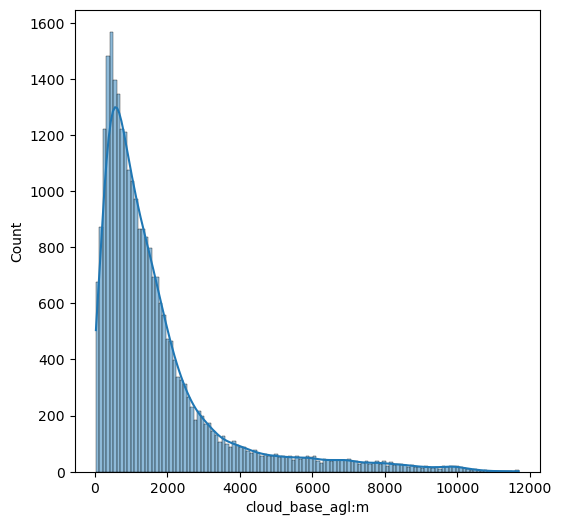

In [409]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

X = X_train_observed_a_matched 

f = X['cloud_base_agl:m']
sns.histplot(data=f, kde=True)

print(X.isna().sum())
X.describe().transpose()

In [410]:
#Missing values
X_train_estimated_a_final = X_train_estimated_a_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_a_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_estimated_a_matched['cloud_base_agl:m'].median()})

X_train_observed_a_final = X_train_observed_a_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_a_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_observed_a_matched['cloud_base_agl:m'].median()})

X_test_estimated_a_final = X_test_estimated_a.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_a['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_test_estimated_a['cloud_base_agl:m'].median()})


X_train_estimated_b_final = X_train_estimated_b_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_b_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_estimated_b_matched['cloud_base_agl:m'].median()})

X_train_observed_b_final = X_train_observed_b_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_b_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_observed_b_matched['cloud_base_agl:m'].median()})

X_test_estimated_b_final = X_test_estimated_b.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_b['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_test_estimated_b['cloud_base_agl:m'].median()})


X_train_estimated_c_final = X_train_estimated_c_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_c_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_estimated_c_matched['cloud_base_agl:m'].median()})

X_train_observed_c_final = X_train_observed_c_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_c_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_observed_c_matched['cloud_base_agl:m'].median()})

X_test_estimated_c_final = X_test_estimated_c.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_c['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_test_estimated_c['cloud_base_agl:m'].median()})


In [411]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_train_estimated_a_scaled = scaler.fit_transform(X_train_estimated_a_final)
X_train_observed_a_scaled = scaler.fit_transform(X_train_observed_a_final)
X_test_estimated_a_scaled = scaler.fit_transform(X_test_estimated_a_final)

X_train_estimated_b_scaled = scaler.fit_transform(X_train_estimated_b_final)
X_train_observed_b_scaled = scaler.fit_transform(X_train_observed_b_final)
X_test_estimated_b_scaled = scaler.fit_transform(X_test_estimated_b_final)

X_train_estimated_c_scaled = scaler.fit_transform(X_train_estimated_c_final)
X_train_observed_c_scaled = scaler.fit_transform(X_train_observed_c_final)
X_test_estimated_c_scaled = scaler.fit_transform(X_test_estimated_c_final)

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
diffuse_rad:W                     0
direct_rad:W                      0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
precip_5min:mm                    0
pressure_100m:hPa                 0
prob_rime:p                       0
rain_water:kgm2                   0
relative_humidity_1000hPa:p       0
snow_depth:cm                     0
snow_melt_10min:mm                0
snow_water:kgm2                   0
sun_elevation:d                   0
super_cooled_liquid_water:kgm2    0
t_1000hPa:K                       0
total_cloud_cover:p               0
visibility:m                      0
wind_speed_10m:ms           

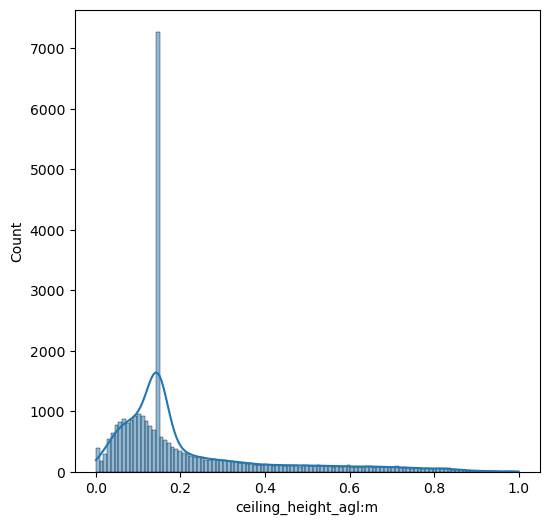

In [412]:
X = pd.DataFrame(X_train_observed_a_scaled, columns = X_train_observed_a_final.columns)
X.set_index(X_train_observed_a_final.index, inplace= True)
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X['ceiling_height_agl:m']
sns.histplot(data=f, kde=True)

print(X.isna().sum())

In [413]:
X_train_total_a = np.concatenate((X_train_observed_a_scaled, X_train_estimated_a_scaled), axis = 0)
X_train_total_b = np.concatenate((X_train_observed_b_scaled, X_train_estimated_b_scaled), axis = 0)
X_train_total_c = np.concatenate((X_train_observed_c_scaled, X_train_estimated_c_scaled), axis = 0)

In [414]:
train_a_total = pd.concat([train_a_observed_matched, train_a_estimated_matched], axis = 0)
train_a_total = train_a_total.to_numpy()

train_b_total = pd.concat([train_b_observed_matched, train_b_estimated_matched], axis = 0)
train_b_total = train_b_total.to_numpy()

train_c_total = pd.concat([train_c_observed_matched, train_c_estimated_matched], axis = 0)
train_c_total = train_c_total.to_numpy()

In [415]:
train_a_total.shape

(34061, 1)

In [420]:
train_X_Y_a = np.concatenate((X_train_total_a, train_a_total), axis = 1)
train_X_Y_a.shape

train_X_Y_b = np.concatenate((X_train_total_b, train_b_total), axis = 1)
train_X_Y_b.shape

train_X_Y_c = np.concatenate((X_train_total_c, train_c_total), axis = 1)
train_X_Y_a.shape

(34061, 50)

In [417]:
for column in X_train_estimated_a_final.columns:
    if column not in X_test_estimated_a_final.columns:
        print(column)
        
print(X_train_estimated_a_final.shape)
print(X_test_estimated_a_final.shape)
print(X_train_estimated_a_scaled.shape)
print(X_test_estimated_a_scaled.shape)

(4394, 49)
(720, 49)
(4394, 49)
(720, 49)


# Implementation of a LSTM with a varying timestep : LOCATION A
#### cf https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [459]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [460]:
# choose a number of time steps
n_steps_in, n_steps_out = 48, 1
# covert into input/output
X, y = split_sequences(train_X_Y_a, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data

(34014, 48, 49) (34014, 1)


In [461]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_features = X.shape[2]
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [477]:
model.fit(X, y, epochs=10, verbose=3)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [478]:
print(model.get_weights())

[array([[-0.05109338,  0.09779143, -0.01645312, ...,  0.04473047,
        -0.01738584, -0.02215122],
       [ 0.07692745,  0.06932019,  0.06159054, ...,  0.16122814,
         0.08523182,  0.00144546],
       [-0.01796694,  0.00094156,  0.09371512, ..., -0.05883146,
        -0.0356089 , -0.04489351],
       ...,
       [-0.11128089,  0.03463205,  0.09775589, ...,  0.04236676,
        -0.07238083, -0.01501978],
       [-0.09610266, -0.17313291, -0.00588019, ..., -0.01043827,
         0.00481272,  0.07425633],
       [-0.09008239, -0.08922512,  0.03268452, ..., -0.19188334,
        -0.01436872, -0.07254054]], dtype=float32), array([[-0.01414746, -0.03287681,  0.06587382, ...,  0.07006102,
        -0.0464966 ,  0.02940951],
       [ 0.05764612, -0.06089504,  0.01306706, ..., -0.04052056,
         0.02412779, -0.01417924],
       [ 0.03368228, -0.01954686, -0.01166693, ..., -0.1250288 ,
        -0.06338206, -0.1675395 ],
       ...,
       [-0.13468602, -0.01378554,  0.02064998, ..., -0.132

In [479]:
def split_sequences_X(sequences, n_steps_in, n_steps_out):
    X = list() 
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
    # gather input and output parts of the pattern
        seq_x = sequences[i:end_ix, :]
        X.append(seq_x)
    return np.array(X)

In [480]:
X_input = split_sequences_X(np.concatenate((X_train_estimated_a_scaled[-47:, :], X_test_estimated_a_scaled), axis = 0), 48, 1)

In [481]:
X_input.shape

(720, 48, 49)

In [482]:
y_pred_a = (model.predict(X_input, verbose=3))

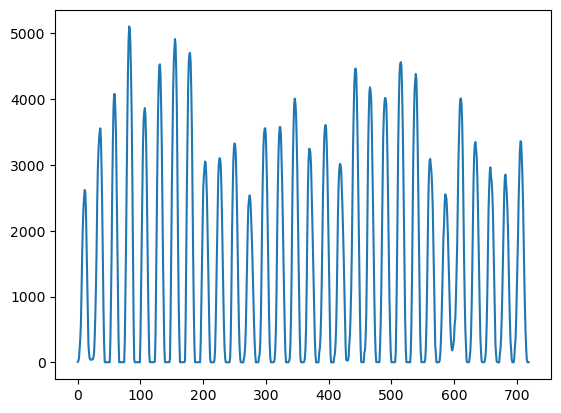

In [483]:
plt.plot(y_pred_a)
#donc à faire, garder le même modèle mais le y doit faire (30, 24)??... 


In [484]:
df_pred_a = pd.DataFrame(y_pred_a)
df_pred_a.rename(columns = {0 : 'prediction'}, inplace = True)
df_pred_a.set_index(X_test_estimated_a_final.index, inplace = True)

In [485]:
max(df_pred_a['prediction'])

5105.61669921875

<Axes: xlabel='time'>

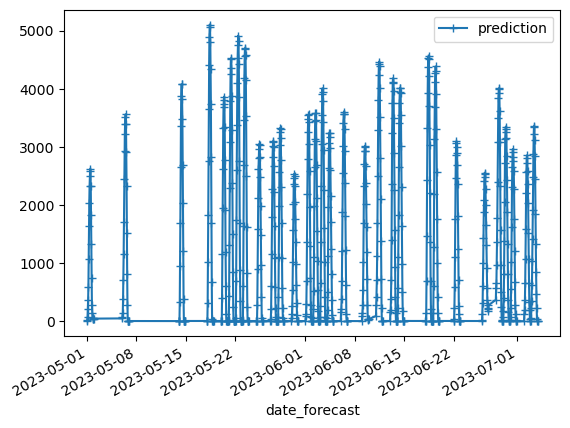

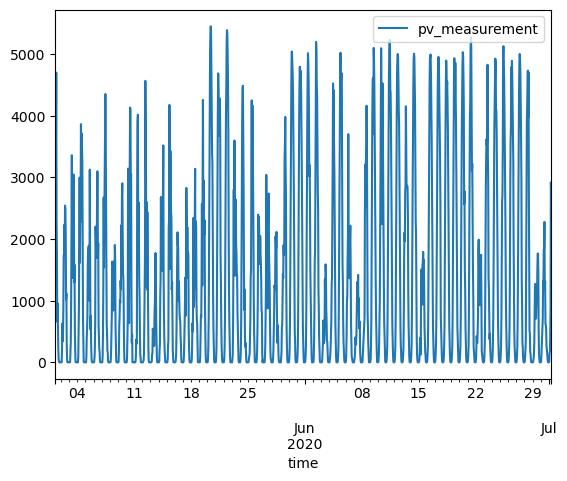

<Figure size 640x480 with 0 Axes>

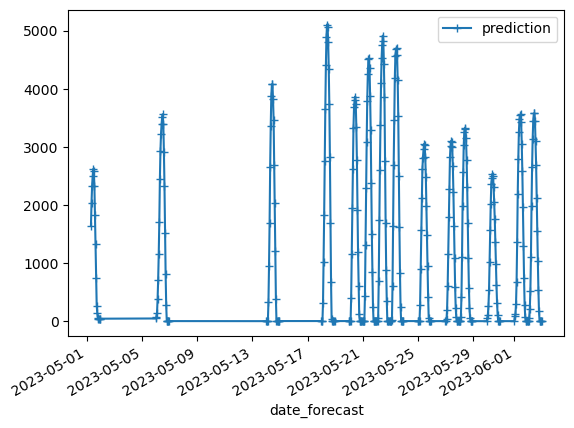

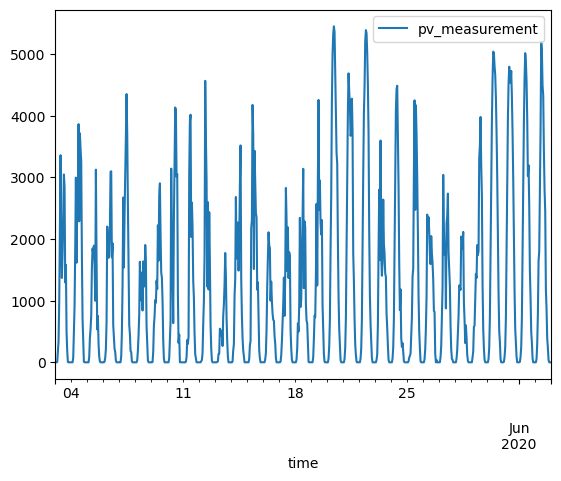

In [486]:
df_pred_a.plot(marker = '+'), train_a['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_a['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_a['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [487]:
for date in df_pred_a.index : 
    if df_pred_a.loc[date]['prediction'] < 0 :
        df_pred_a.loc[date]['prediction'] = 0

In [488]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a.reset_index(inplace = True)
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

,id,time,prediction,location
0,0,2023-05-01 00:00:00,8.859426,A
1,1,2023-05-01 01:00:00,23.119440,A
2,2,2023-05-01 02:00:00,68.718781,A
3,3,2023-05-01 03:00:00,211.133072,A
4,4,2023-05-01 04:00:00,356.293396,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,221.310013,A
716,716,2023-07-03 20:00:00,42.922935,A
717,717,2023-07-03 21:00:00,3.087725,A
718,718,2023-07-03 22:00:00,3.365218,A


# Implementation of a LSTM with a varying timestep : LOCATION B

In [489]:
# choose a number of time steps
n_steps_in, n_steps_out = 48, 1
# covert into input/output
X, y = split_sequences(train_X_Y_b, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data

(32772, 48, 49) (32772, 1)


In [490]:
n_features = X.shape[2]
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mae')

In [492]:
model.fit(X, y, epochs=10, verbose=3)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [493]:
X_input = split_sequences_X(np.concatenate((X_train_estimated_b_scaled[-47:, :], X_test_estimated_b_scaled), axis = 0), 48, 1)

In [494]:
y_pred_b = model.predict(X_input, verbose=3)

In [495]:
df_pred_b = pd.DataFrame(y_pred_b)
df_pred_b.rename(columns = {0 : 'prediction'}, inplace = True)
df_pred_b.set_index(X_test_estimated_b_final.index, inplace = True)

<Axes: xlabel='time'>

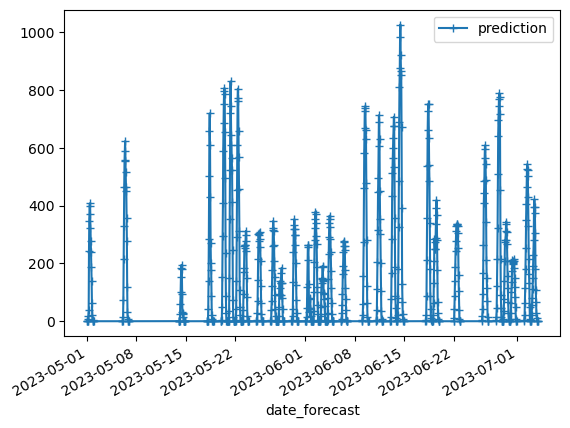

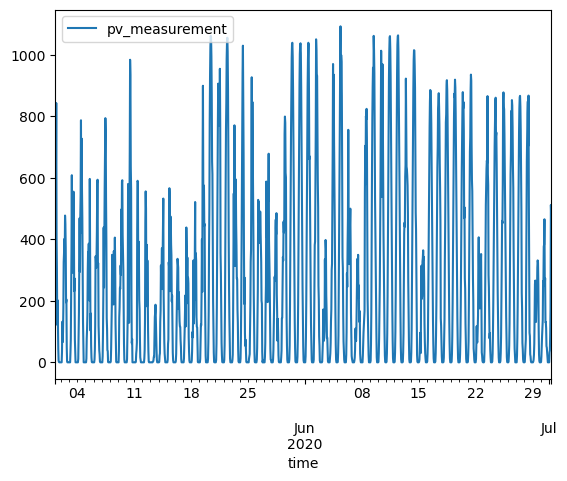

<Figure size 640x480 with 0 Axes>

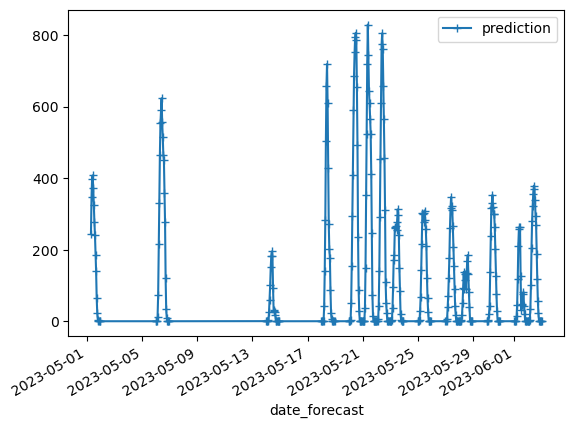

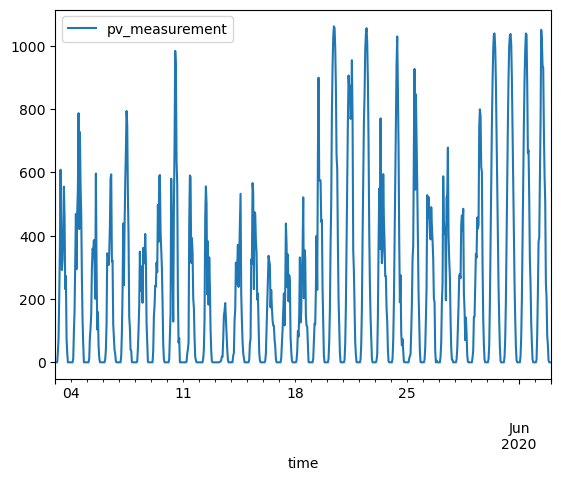

In [496]:
df_pred_b.plot(marker = '+'), train_b['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_b['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_b['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [497]:
for date in df_pred_b.index : 
    if df_pred_b.loc[date]['prediction'] < 0 :
        df_pred_b.loc[date]['prediction'] = 0

In [499]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b.reset_index(inplace = True)
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.011299,B
1,1,2023-05-01 01:00:00,0.009798,B
2,2,2023-05-01 02:00:00,0.011279,B
3,3,2023-05-01 03:00:00,1.055478,B
4,4,2023-05-01 04:00:00,6.949162,B
...,...,...,...,...
715,715,2023-07-03 19:00:00,12.845926,B
716,716,2023-07-03 20:00:00,1.952283,B
717,717,2023-07-03 21:00:00,0.006324,B
718,718,2023-07-03 22:00:00,0.000000,B


# Implementation of a LSTM with a varying timestep : LOCATION C

In [500]:
# choose a number of time steps
n_steps_in, n_steps_out = 48, 1
# covert into input/output
X, y = split_sequences(train_X_Y_c, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data

(26024, 48, 50) (26024, 1)


In [501]:
n_features = X.shape[2]
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mae')

In [502]:
model.fit(X, y, epochs=10, verbose=3)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [503]:
X_input = split_sequences_X(np.concatenate((X_train_estimated_c_scaled[-47:, :], X_test_estimated_c_scaled), axis = 0), 48, 1)

In [504]:
y_pred_c = model.predict(X_input, verbose=3)

In [505]:
df_pred_c = pd.DataFrame(y_pred_c)
df_pred_c.rename(columns = {0 : 'prediction'}, inplace = True)
df_pred_c.set_index(X_test_estimated_c_final.index, inplace = True)

<Axes: xlabel='time'>

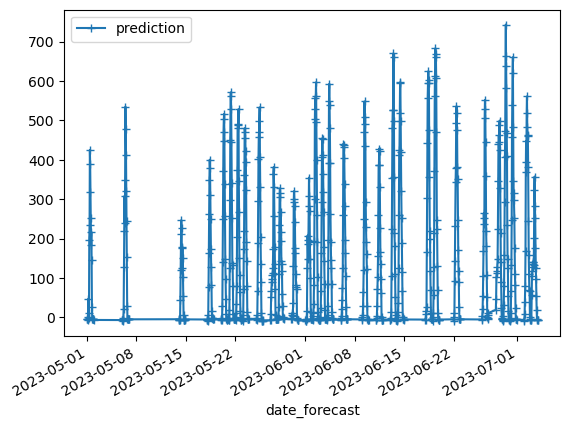

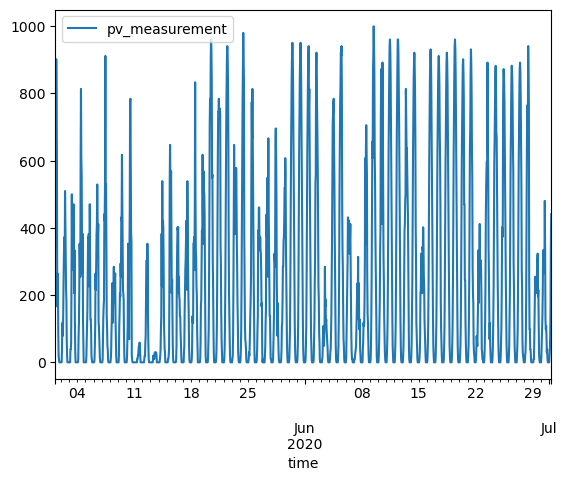

<Figure size 640x480 with 0 Axes>

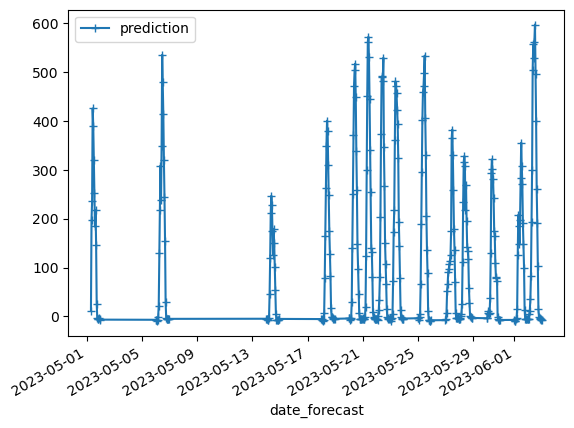

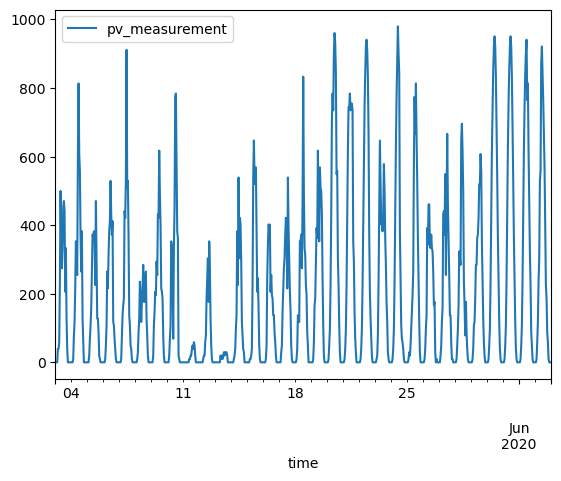

In [506]:
df_pred_c.plot(marker = '+'), train_c['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_c['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_c['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [507]:
for date in df_pred_c.index : 
    if df_pred_c.loc[date]['prediction'] < 0 :
        df_pred_c.loc[date]['prediction'] = 0

In [508]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c.reset_index(inplace = True)
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,C
1,1,2023-05-01 01:00:00,0.000000,C
2,2,2023-05-01 02:00:00,0.000000,C
3,3,2023-05-01 03:00:00,0.000000,C
4,4,2023-05-01 04:00:00,0.000000,C
...,...,...,...,...
715,715,2023-07-03 19:00:00,17.682619,C
716,716,2023-07-03 20:00:00,0.000000,C
717,717,2023-07-03 21:00:00,0.000000,C
718,718,2023-07-03 22:00:00,0.000000,C


In [509]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
df_pred_total

,id,time,prediction,location
0,0,2023-05-01 00:00:00,8.859426,A
1,1,2023-05-01 01:00:00,23.119440,A
2,2,2023-05-01 02:00:00,68.718781,A
3,3,2023-05-01 03:00:00,211.133072,A
4,4,2023-05-01 04:00:00,356.293396,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,17.682619,C
716,716,2023-07-03 20:00:00,0.000000,C
717,717,2023-07-03 21:00:00,0.000000,C
718,718,2023-07-03 22:00:00,0.000000,C


In [510]:
df_pred_final.to_csv('submission_11.csv', index=False)